## Student Info

* Student name 1:
* Student ID 1:

* Student name 2:
* Student ID 2:

## Project Info

This project aims to get hands-on experience in implementing some Classification and clustering algorithms taught in Data Mining and Applications course.

There are 2 exercises in this project:
* Binary classification using Decision Tree (ID3 algorithm)
* Data clustering with K-means clustering

## Instructions

### How to finish

To finish the project, fill in:
- ```YOUR CODE HERE``` in code cells

- ```Your answer here``` in text cells.


<font color='red'>**NOTE:**</font>

- Your project must be finished by your own self. You may discuss with the others, but must not copy (partially or entirely) their codes or solutions. You will receive a <font color='red'>0 point</font> for this project if you violate this plagiarism rule.

- You can create new cells to clarify your code / answer, however, please <font color='red'>do not delete any pre-defined code cells or test case cells</font> as it may affect the grading results.

- The given test cases (if any) are used to only assist your code debugging / unit testing. Passing these test cases does not necessarily mean you will get the maximum point for the exercise.

### How to submit

In the grading stage, I will first select `Kernel` - `Restart Kernel & Run All Cells` to restart and run all cells in your notebook. As a result, before submitting your project, you should run `Kernel` - `Restart Kernel & Run All Cells` to ensure your code will run as you expect.

After that, rename your notebook as `ID1_ID2.ipynb` (e.g. `19123_19456.ipynb`) and submit on Moodle.

<font color=red>Please follow the above submission guidelines. Any violation of these instructions may cost you some penalty points!!!</font>


## Exercise 1: Classification (6 points)

### Requirements

You will need to implement Decision Tree algorithm (ID3) in Python language.

**Description**:

- In this exercise, you only need to build a decision tree model using categorical attributes (no need to handle numerical attributes). You may transform numerical attributes into categorical before feeding into classification model.

- A sample belongs to either one of the given labels (binary classification).

- Dataset: [tennis.txt](https://drive.google.com/file/d/1jv67IlMIxGxwGGaP47AZ_1t3mxIn82Y7/view?usp=sharing) and [titanic2.txt](https://drive.google.com/file/d/1IwOxcPz-Hq1_JOOfGylJxy1TYhDvfEsg/view?usp=sharing)


You will need to implement `load_data` function and DecisionTree class with the following methods:

- ```fit```: build tree from given dataset, using ID3 algorithm

- ```predict```: make predictions on new data points using the trained decision tree

- ```visualize```: plot trained decision tree from training dataset. You may choose how to visualize the trained model, as long as the tree structure of the model is clarified (you may use available visualization packages such as ```tree``` or ```graphviz```, or implement the visualization code yourself). For example, a simple representation of a decision tree built from [tennis.txt](https://drive.google.com/file/d/1jv67IlMIxGxwGGaP47AZ_1t3mxIn82Y7/view?usp=sharing) dataset may look like:


```
outlook = sunny
|  humidity = high: no
|  humidity = normal: yes
outlook = overcast: yes
outlook = rainy
|  windy = TRUE: no
|  windy = FALSE: yes
```

**Note**:

- For [tennis.txt](https://drive.google.com/file/d/1jv67IlMIxGxwGGaP47AZ_1t3mxIn82Y7/view?usp=sharing) dataset, you can use all samples for training without spliting into train and test set. For [titanic2.txt](https://drive.google.com/file/d/1IwOxcPz-Hq1_JOOfGylJxy1TYhDvfEsg/view?usp=sharing) dataset, you may need to split into train/test with the ratio of 80/20 (use ```sklearn.model_selection.train_test_split``` with ```random_state=520``` for reproducibility)

- ```load_data``` function and ```DecisionTree``` class must be implemented once only and be usable for different datasets

- For each dataset, you need to ```load_data``` from input files, ```fit``` train dataset into model, use the trained model to ```predict``` on ```X_train``` and ```X_test``` (if any), calculate accuracy (use ```sklearn.metrics.accuracy_score```), and eventually ```visualize``` trained model

### Implementation (6 points)

In [138]:
import pandas as pd
import numpy as np
from numpy import log2 as log
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import pydotplus

In [100]:
def load_data(file_path: str, split: bool = True):
    """
    Load data from file_path and return numpy data

    Parameters
    ----------
    file_path : str
        The path of input data file (tab separated).
    split : bool
        Whether or not to return test set.

    Returns
    ----------
    (X_train, y_train) if split = False, else
    (X_train, y_train), (X_test, y_test): training and testing numpy array
    """
    with open(file_path) as f:
        lines = f.readlines()

    # get feature names from the first row
    feature_names = lines[0].strip().split('\t')[:-1]

    # get training data from the second row onwards
    data = [line.strip().split('\t') for line in lines[1:]]
    X_train = np.array(data)[:, :-1]
    y_train = np.array(data)[:, -1]

    # Encode target variable y_train to binary values
    y_train = np.array([1 if label == 'yes' else 0 for label in y_train])

    # One-hot encode the features
    encodings = []
    for i in range(X_train.shape[1]):
        unique_values = np.unique(X_train[:, i])
        encoding = dict(zip(unique_values, range(len(unique_values))))
        encodings.append(encoding)
        for k, row in enumerate(X_train):
            X_train[k][i] = encoding[row[i]]

    X_train = X_train.astype(int)
    y_train = y_train.astype(int)

    # Split into train and test set
    if split:
        X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=520)
        return (X_train, y_train), (X_test, y_test), feature_names
    else:
        return X_train, y_train, feature_names


In [12]:
import math
def entropy(counts, n_samples):
    """
    Parameters:
    -----------
    counts: shape (n_classes): list number of samples in each class
    n_samples: number of data samples
    
    -----------
    return entropy 
    """
    #TODO
    entropy = 0
    
    for c in counts: 
        entropy +=  - (c*1.0/n_samples)*math.log(c*1.0/n_samples, 2)
    
    return entropy

In [13]:
def entropy_of_one_division(division): 
    """
    Returns entropy of a divided group of data
    Data may have multiple classes
    """
    n_samples = len(division)
    n_classes = set(division)
    
    counts=[]
    #count samples in each class then store it to list counts
    #TODO:
    for c in n_classes:
        counts.append(sum(division==c))
    
    return entropy(counts,n_samples),n_samples


In [14]:
def get_entropy(y_predict, y):
    """
    Returns entropy of a split
    y_predict is the split decision by cutoff, True/Fasle
    """
    n = len(y)
    entropy_true, n_true = entropy_of_one_division(y[y_predict]) # left hand side entropy
    entropy_false, n_false = entropy_of_one_division(y[~y_predict]) # right hand side entropy
    # overall entropy
    #TODO s=?

    s = (n_true*1.0/n)*entropy_true + (n_false*1.0/n)*entropy_false
    
    return s

In [76]:
class DecisionTreeClassifier:
    def __init__(self, tree=None, depth=0, feature_names=None):
        '''Parameters:
        -----------------
        tree: decision tree
        depth: depth of decision tree after training'''
        
        self.depth = depth
        self.tree=tree
        self.feature_names=feature_names
    def fit(self, X, y, node={}, depth=0):
        '''Parameter:
        -----------------
        X: training data
        y: label of training data
        ------------------
        return: node 
        
        node: each node represented by cutoff value and column index, value and children.
         - cutoff value is thresold where you divide your attribute
         - column index is your data attribute index
         - value of node is mean value of label indexes, 
           if a node is leaf all data samples will have same label
        
        Note that: we divide each attribute into 2 part => each node will have 2 children: left, right.
        '''
        
        #Stop conditions
        #if all value of y are the same 
        if np.all(y==y[0]):
            return {'val':y[0]}

        else: 
            col_idx, cutoff, entropy = self.find_best_split_of_all(X, y)    # find one split given an information gain 
            y_left = y[X[:, col_idx] < cutoff]
            y_right = y[X[:, col_idx] >= cutoff]
            node = {'index_col':col_idx,
                        'cutoff':cutoff,
                   'val':np.mean(y)}
            node['left'] = self.fit(X[X[:, col_idx] < cutoff], y_left, {}, depth+1)
            node['right'] = self.fit(X[X[:, col_idx] >= cutoff], y_right, {}, depth+1)
            self.depth += 1 
            self.tree = node
            return node
    
    def find_best_split_of_all(self, X, y):
        col_idx = None
        min_entropy = 1
        cutoff = None
        for i, col_data in enumerate(X.T):
            entropy, cur_cutoff = self.find_best_split(col_data, y)
            if entropy == 0:                   #best entropy
                return i, cur_cutoff, entropy
            elif entropy <= min_entropy:
                min_entropy = entropy
                col_idx = i
                cutoff = cur_cutoff
               
        return col_idx, cutoff, min_entropy
    
    def find_best_split(self, col_data, y):
        ''' Parameters:
        -------------
        col_data: data samples in column'''
         
        min_entropy = 10
        
        for value in set(col_data):
            y_predict = col_data < value
            my_entropy = get_entropy(y_predict, y)
            #TODO
            #min entropy=?, cutoff=?
            if (min_entropy > my_entropy): 
                min_entropy = my_entropy 
                cutoff = value
            
        return min_entropy, cutoff
                                               
    def predict(self, X):
        tree = self.tree
        pred = np.zeros(shape=len(X))
        for i, c in enumerate(X):
            pred[i] = self._predict(c)
        return pred
    
    def _predict(self, row):
        cur_layer = self.tree
        while cur_layer.get('cutoff'):
            if row[cur_layer['index_col']] < cur_layer['cutoff']:
                cur_layer = cur_layer['left']
            else:
                cur_layer = cur_layer['right']
        else:
            return cur_layer.get('val')
        
    def visualize_tree(self):
        self.print_tree(self.tree)
        
    def print_tree(node, depth=0):
        if node is None:
            return
        if node.get('cutoff'):
            print(f"X{node['index_col']} < {node['cutoff']}")
            print_tree(node.get('left'), depth+1)
            print_tree(node.get('right'), depth+1)
        else:
            print(f"Class: {node['val']}")

        
    # previous code...
 

In [77]:
# 0.5 = 0.25 (tennis dataset) + 0.25 (titanic2 dataset) 

### NOTE: Flow to run your code (do this for all your datasets)

# dataset 1 (create one cell for each dataset with the following content)

tree = DecisionTreeClassifier()
X_train, y_train,name = load_data("data/tennis.txt",split=False)
print(X_train)
print(y_train)
tree.fit(X_train, y_train,name)
print(tree.fit(X_train, y_train))
y_hat_train = tree.predict(X_train) 
acc_train = accuracy_score(y_train, y_hat_train)
print(acc_train)
tree.visualize_tree()

[[2 1 0 1]
 [2 1 0 0]
 [0 1 0 1]
 [1 2 0 1]
 [1 0 1 1]
 [1 0 1 0]
 [0 0 1 0]
 [2 2 0 1]
 [2 0 1 1]
 [1 2 1 1]
 [2 2 1 0]
 [0 2 0 0]
 [0 1 1 1]
 [1 2 0 0]]
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]
{'index_col': 0, 'cutoff': 1, 'val': 0.6428571428571429, 'left': {'val': 1}, 'right': {'index_col': 2, 'cutoff': 1, 'val': 0.5, 'left': {'index_col': 0, 'cutoff': 2, 'val': 0.2, 'left': {'index_col': 3, 'cutoff': 1, 'val': 0.5, 'left': {'val': 0}, 'right': {'val': 1}}, 'right': {'val': 0}}, 'right': {'index_col': 3, 'cutoff': 1, 'val': 0.8, 'left': {'index_col': 0, 'cutoff': 2, 'val': 0.5, 'left': {'val': 0}, 'right': {'val': 1}}, 'right': {'val': 1}}}}
1.0


AttributeError: 'DecisionTreeClassifier' object has no attribute 'get'

In [49]:
tree = DecisionTreeClassifier()
(X_train, y_train), (X_test, y_test),name = load_data("data/titanic2.txt",split=True)
print(X_train)
print(y_train)
print(tree.fit(X_train, y_train))
# y_hat_train = tree.predict(X_train) 
# acc_train = accuracy_score(y_train, y_hat_train)
# y_hat_test = tree.predict(X_test) 
# acc_test = accuracy_score(y_test, y_hat_test)
# tree.visualize()

[[0 0 1]
 [3 0 1]
 [3 0 1]
 ...
 [1 0 0]
 [2 1 1]
 [1 0 1]]
[0 0 0 ... 1 0 0]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [104]:
def find_entropy(y):
    entropy = 0
    values = np.unique(y)
    for value in values:
        fraction = np.sum(y == value) / len(y)
        entropy += -fraction * np.log2(fraction)
    return entropy

def find_entropy_attribute(X, y, attribute):
    values = np.unique(X[:, attribute])
    entropy2 = 0
    for value in values:
        entropy = find_entropy(y[X[:, attribute] == value])
        fraction = np.sum(X[:, attribute] == value) / len(y)
        entropy2 += -fraction * entropy
    return abs(entropy2)

def find_winner(X, y):
    information_gains = []
    for i in range(X.shape[1]):
        information_gain = find_entropy(y) - find_entropy_attribute(X, y, i)
        information_gains.append(information_gain)
    max_gain_index = np.argmax(information_gains)
    return max_gain_index


def get_subtable(X, y, node, value):
    X_subset = X[X[:, node] == value]
    y_subset = y[X[:, node] == value]
    return np.delete(X_subset, node, axis=1), y_subset

def buildTree(X, y, feature_names, tree=None):
    if tree is None:
        tree = {}
    if len(np.unique(y)) == 1:
        return y[0]
    if X.shape[1] == 0:
        return np.argmax(np.bincount(y))
    node = find_winner(X, y)
    print(node)
    node_name = feature_names[node]
    print(feature_names[node])
    tree[node_name] = {}
    for value in np.unique(X[:, node]):
        X_subset, y_subset = get_subtable(X, y, node, value)
        if X_subset.shape[1] == 0:
            tree[node_name][value] = np.argmax(np.bincount(y_subset))
        else:
            tree[node_name][value] = buildTree(X_subset, y_subset, feature_names)
    return tree

In [105]:
import pprint
X_train, y_train, feature_names = load_data('data/tennis.txt', split=False)
print(feature_names)
tree=buildTree(X_train,y_train,feature_names)
pprint.pprint(tree)
# Convert the input data to numerical values





['outlook', 'temperature', 'humidity', 'wind']
0
outlook
2
humidity
1
temperature
{'outlook': {0: 1,
             1: {'humidity': {0: 0, 1: 1}},
             2: {'temperature': {0: 0, 1: 1}}}}


In [139]:
import numpy as np
import pprint
def find_entropy(y):
    entropy = 0
    values = np.unique(y)
    for value in values:
        fraction = np.sum(y == value) / len(y)
        entropy += -fraction * np.log2(fraction)
    return entropy

def find_entropy_attribute(X, y, attribute):
    values = np.unique(X[:, attribute])
    entropy2 = 0
    for value in values:
        entropy = find_entropy(y[X[:, attribute] == value])
        fraction = np.sum(X[:, attribute] == value) / len(y)
        entropy2 += -fraction * entropy
    return abs(entropy2)

def find_winner(X, y):
    information_gains = []
    for i in range(X.shape[1]):
        information_gain = find_entropy(y) - find_entropy_attribute(X, y, i)
        information_gains.append(information_gain)
    max_gain_index = np.argmax(information_gains)
    return max_gain_index


def get_subtable(X, y, node, value):
    X_subset = X[X[:, node] == value]
    y_subset = y[X[:, node] == value]
    return np.delete(X_subset, node, axis=1), y_subset



def buildTree(df, tree=None):
    if tree is None:
        tree = {}
    if len(np.unique(y)) == 1:
        return y[0]
    if X.shape[1] == 0:
        return np.argmax(np.bincount(y))
    node = find_winner(X, y)
    node_name = feature_names[node]
    tree[node_name] = {}
    values = np.unique(X[:, node])
    for value in values:
        X_subset, y_subset = get_subtable(X, y, node, value)
        if len(np.unique(y_subset)) == 1:
            tree[node_name][value] = y_subset[0]
        else:
            subtree = buildTree(X_subset, y_subset, feature_names)
            tree[node_name][value] = subtree
    if node_name not in ['Outlook', 'Wind', 'Humidity', 'Temperature']:
        return tree[node_name][values[0]]
    return tree


X,y,_= load_data('tennis.csv')

tree = buildTree(X, y,_)
print(tree)


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\arraysetops.py:272: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


ValueError: could not broadcast input array from shape (3,0) into shape (3,)

In [149]:
import numpy as np
import pandas as pd

class DecisionTreee:
    def __init__(self):
        self.tree = None
        
    def find_entropy(self, df):
        Class = df.keys()[-1]
        entropy = 0
        values = df[Class].unique()
        for value in values:
            fraction = df[Class].value_counts()[value]/len(df[Class])
            entropy += -fraction*np.log2(fraction)
        return entropy
    
    def find_entropy_attribute(self, df, attribute):
        Class = df.keys()[-1]
        target_variables = df[Class].unique()
        variables = df[attribute].unique()
        entropy2 = 0
        for variable in variables:
            entropy = 0
            for target_variable in target_variables:
                num = len(df[attribute][df[attribute]==variable][df[Class] ==target_variable])
                den = len(df[attribute][df[attribute]==variable])
                fraction = num/(den+np.finfo(float).eps)
                entropy += -fraction*np.log2(fraction+np.finfo(float).eps)
            fraction2 = den/len(df)
            entropy2 += -fraction2*entropy
        return abs(entropy2)
    
    def find_winner(self, df):
        IG = []
        for key in df.keys()[:-1]:
            IG.append(self.find_entropy(df)-self.find_entropy_attribute(df,key))
        return df.keys()[:-1][np.argmax(IG)] 
    
    def get_subtable(self, df, node, value):
        return df[df[node] == value].reset_index(drop=True)
    
    def buildTree(self,df, tree=None): 
        Class = df.keys()[-1]
        node = self.find_winner(df)
        attValue = np.unique(df[node])
        print(attValue)
        if tree is None:                    
            tree={}
            tree[node] = {}
        for value in attValue:
            subtable = self.get_subtable(df,node,value)
            clValue,counts = np.unique(subtable[df.keys()[-1]],return_counts=True)                        
            if len(counts)==1:
                tree[node][value] = clValue[0]                                                    
            else:        
                tree[node][value] = self.buildTree(subtable)               
        return tree
    def fit(self,df):
        self.tree=buildTree(df,self.tree)
    
    # def predict(self, X):
    #     y_pred = []
    #     for row in X:
    #         y_pred.append(self._predict_row(row, self.tree))
    #     return y_pred
    
    # def _predict_row(self, row, tree):
    #     for node, subtree in tree.items():
    #         value = row[node]
    #         if value not in subtree:
    #             return None
    #         if isinstance(subtree[value], dict):
    #             return self._predict_row(row, subtree[value])
    #         else:
    #             return subtree[value]
                
    def visualize(self):
        pprint.pprint(self.tree)
        



In [150]:
tree = DecisionTreee()
X_train, y_train,temp= load_data("data/tennis.txt",split=False)
# train_data = np.column_stack((X_train, y_train.reshape(-1,1)))
# df = pd.DataFrame(train_data, columns=feature_names + ["class"])
df = pd.read_csv('tennis.csv')
tree.fit(df)
# y_hat_train = tree.predict(X_train) 
# acc_train = accuracy_score(y_train, y_hat_train)
tree.visualize()

['Overcast' 'Rain' 'Sunny']
['Strong' 'Weak']
['High' 'Normal']
{'Outlook': {'Overcast': 'Yes', 'Rain': None, 'Sunny': None}}


-4.754887502163468


### Answer the following question (0.5 points)

**Question 1:** Your comments on the accuracy scores between train and test sets on ```titanic2``` dataset? Elaborate, explain and propose a solution

---

*Your answer here*

## Exercise 2: Clustering (4 points + 1 bonus point)

### Requirements

In this exercise, you will need to implement K-means clustering algorithm on synthetic data.

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist

**Dataset:**

- The synthetic dataset contains 1500 data points that belong to 3 clusters. The clusters' centers are respectively $(2,2), (7,3), (3,6)$. 

- Data points of each cluster are generated randomly from the bivariate normal distribution

In [4]:
seed = 520 # for reproducibility

In [5]:
### Description: generate synthetic data

def generate_data(means, cov, N, K):
    np.random.seed(seed) 
    X0 = np.random.multivariate_normal(means[0], cov, N)
    X1 = np.random.multivariate_normal(means[1], cov, N)
    X2 = np.random.multivariate_normal(means[2], cov, N)

    X = np.concatenate((X0, X1, X2), axis = 0)
    original_label = np.asarray([0]*N + [1]*N + [2]*N).T

    return X, original_label


# visualize data 
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

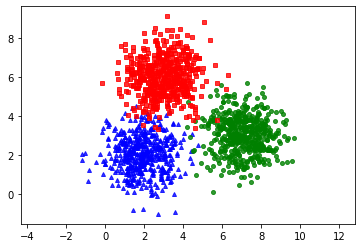

In [6]:
N, K = 500, 3
means = [[2, 2], [7, 3], [3, 6]]
cov = [[1, 0], [0, 1]]

X, original_label = generate_data(means, cov, N, K)
kmeans_display(X, original_label)

You will need to fill in the ```YOUR CODE HERE``` to finish K-means clustering algorithm

### Implementation (4 points)

In [22]:
# 0.5
def kmeans_init_centers(X, k):
    np.random.seed(seed)

    # randomly pick k rows of X as initial centers using np.random.choice function
    
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
centers = kmeans_init_centers(X, K)
assert centers.shape == (K, 2)

In [ ]:
# 1
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances between data and centers using cdist
    # return index of the closest center using np.argmin

    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
assigned_labels = kmeans_assign_labels(X, centers)
assert assigned_labels.shape == (N*3, )

In [ ]:
# 1
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        # take average

        # YOUR CODE HERE
        raise NotImplementedError()
        
    return centers

In [ ]:
# 0.5
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same

    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# 1
def kmeans(X, K):
    # save the center coordinates of each iteration
    centers = [kmeans_init_centers(X, K)]  
    # save the labels of each iteration
    labels = []
    it = 0 
    while True:
        # at each iteration:
        # 1. assign label for each points and append to labels
        # 2. update the centers
        # 3. check the convergence condition
        #    and append NEW center coordinates to centers
        # 4. update iteration 

        # YOUR CODE HERE
        raise NotImplementedError()
    
    return (centers, labels, it)

In [ ]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by k-means algorithm:')
print(centers[-1])
print('='*60)

kmeans_display(X, labels[-1])

### Answer the following questions (bonus 1 point)

**Question 2:** Your comments on the result of K-means algorithm on the synthetic dataset? (0.25)

---

*Your answer here*

**Question 3:** 

- Drawbacks of K-means clustering algorithm (0.5)

- Propose solutions to the drawbacks you stated above (0.25)

---

*Your answer here*